# Project 2:  Introduction to Data Science

Drashti Sanghani

Introduction to Data Science

CS675

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Understanding the data

In [2]:
df = pd.read_csv("D:/PACE/Intro to Data Science/Project 1/telco-customer-churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Existing columns in DataFrame: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


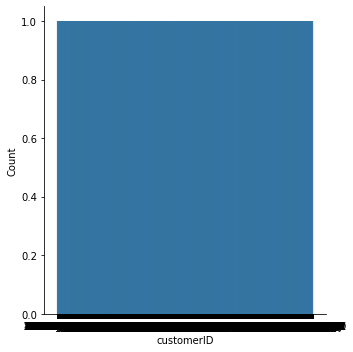

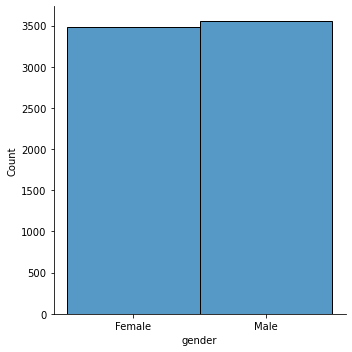

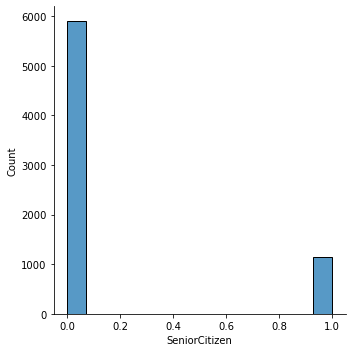

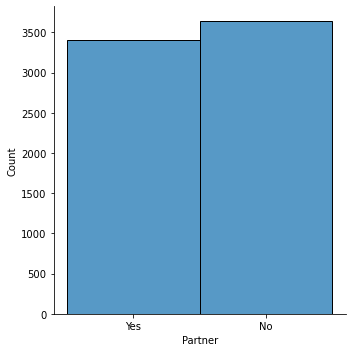

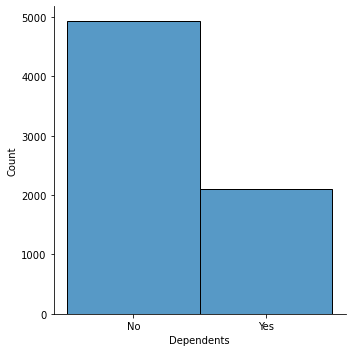

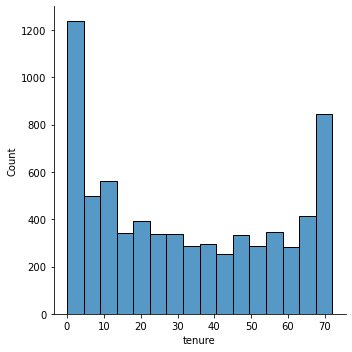

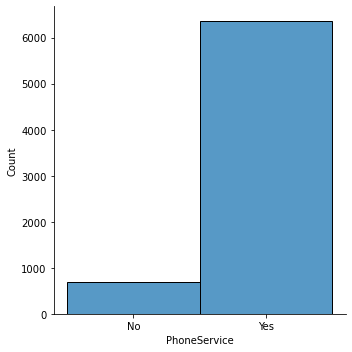

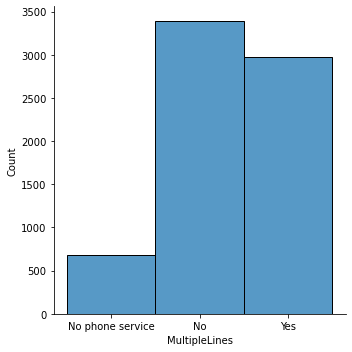

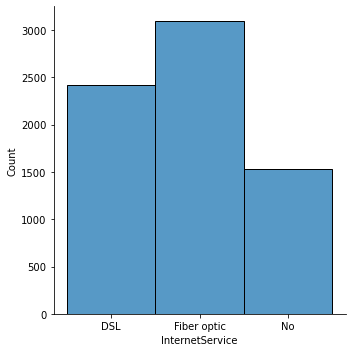

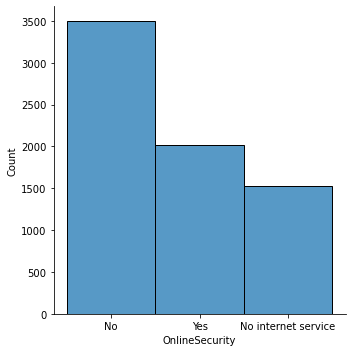

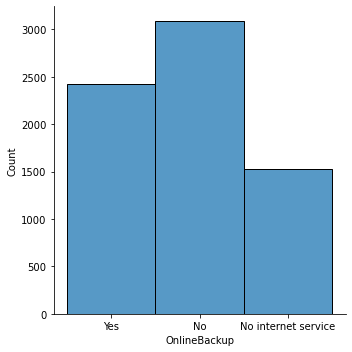

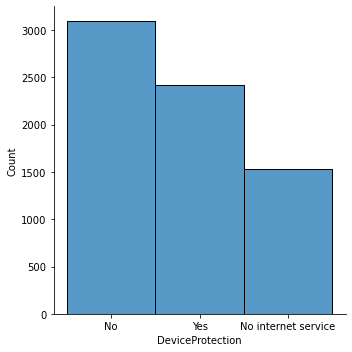

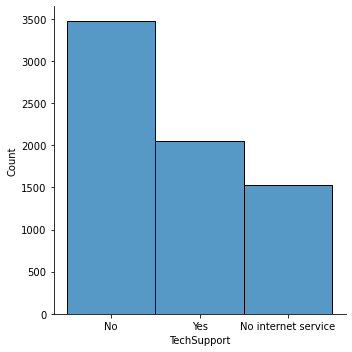

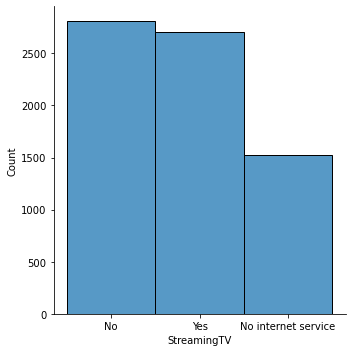

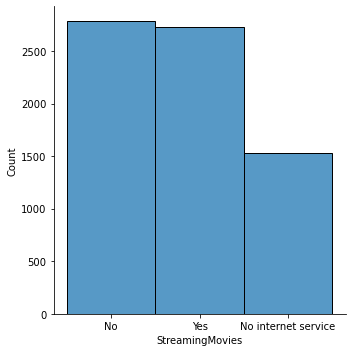

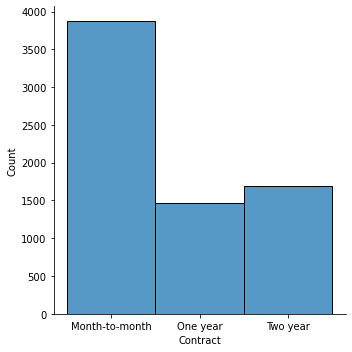

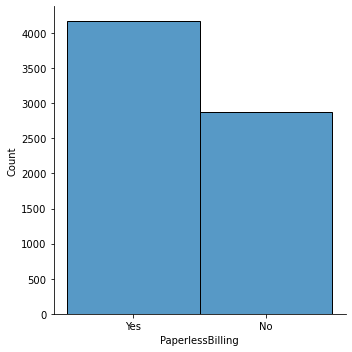

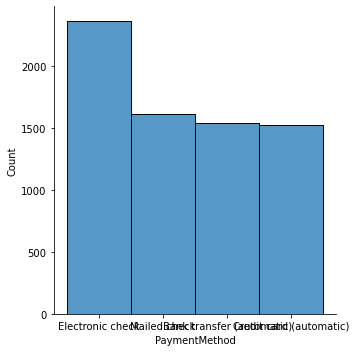

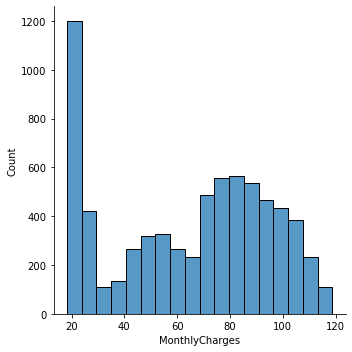

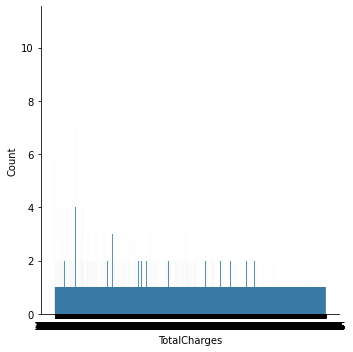

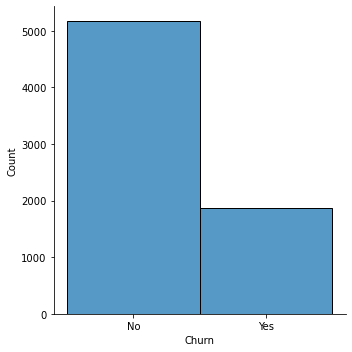

In [6]:
print("Existing columns in DataFrame:", df.columns.tolist())

colms = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
         'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

for colm in colms:
    if colm in df.columns:
        sns.displot(x=df[colm])
    else:
        print(f"Column '{colm}' not found in DataFrame.")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

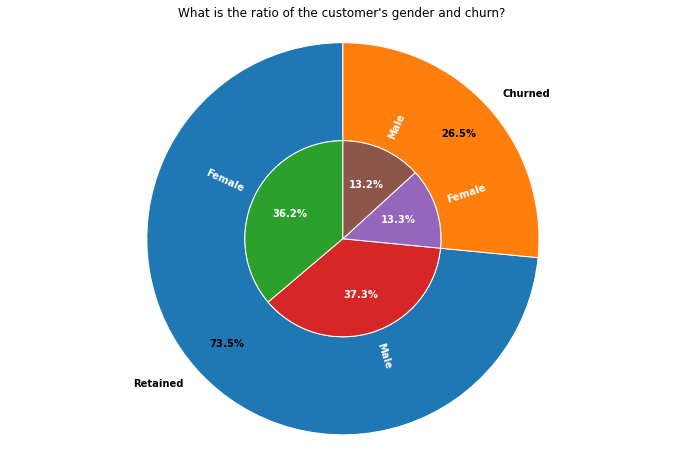

In [10]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df.groupby(["Churn", "gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
axes2.axis('equal')

plt.show()

# Detecting Outliers

Checking for outliers in tenure:
No outliers found in tenure.


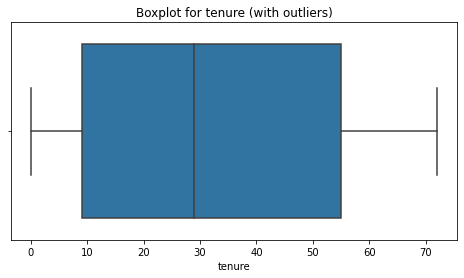



Checking for outliers in MonthlyCharges:
No outliers found in MonthlyCharges.


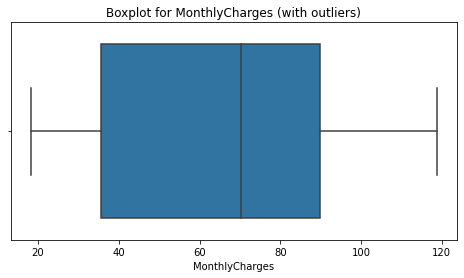



Checking for outliers in TotalCharges:
Error detecting outliers in TotalCharges: unsupported operand type(s) for -: 'str' and 'str'




In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def find_outliers_and_plot(df, column, multiplier=1.5):
    try:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # If no outliers are found, print a message
        if outliers.empty:
            print(f"No outliers found in {column}.")
        else:
            print(f"Outliers found in {column}:")
            print(outliers[[column]])

        # Plot a boxplot to visualize outliers
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column} (with outliers)')
        plt.show()

        return outliers

    except Exception as e:
        print(f"Error detecting outliers in {column}: {e}")

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f"Checking for outliers in {col}:")
    outliers = find_outliers_and_plot(df, col)
    print("\n")


# Converting Categorical values into Numerical Values

In [12]:
df['ChurnVal'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']

existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)

df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ChurnVal,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,No,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [13]:
#data types to confirm all are numeric
print(df.dtypes)

non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns remaining: {non_numeric_columns}")


customerID                                object
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                     object
ChurnVal                                   int64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes

In [14]:
df.isnull().sum()

customerID                               0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
ChurnVal                                 0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV

In [15]:
non_null_counts = df.count()
print("Total non-null values for each column:")
print(non_null_counts)
print("\n")

total_values = df.apply(len)
print("Total values (including NaN) for each column:")
print(total_values)
print("\n")

unique_counts = df.nunique()
print("Total unique values for each column:")
print(unique_counts)
print("\n")

for col in df.select_dtypes(include=['object']).columns:
    print(f"Counts for unique values in '{col}':")
    print(df[col].value_counts())
    print("\n")


Total non-null values for each column:
customerID                               7043
SeniorCitizen                            7043
tenure                                   7043
MonthlyCharges                           7043
TotalCharges                             7043
Churn                                    7043
ChurnVal                                 7043
gender_Male                              7043
Partner_Yes                              7043
Dependents_Yes                           7043
PhoneService_Yes                         7043
MultipleLines_No phone service           7043
MultipleLines_Yes                        7043
InternetService_Fiber optic              7043
InternetService_No                       7043
OnlineSecurity_No internet service       7043
OnlineSecurity_Yes                       7043
OnlineBackup_No internet service         7043
OnlineBackup_Yes                         7043
DeviceProtection_No internet service     7043
DeviceProtection_Yes                     

# Data Visualization

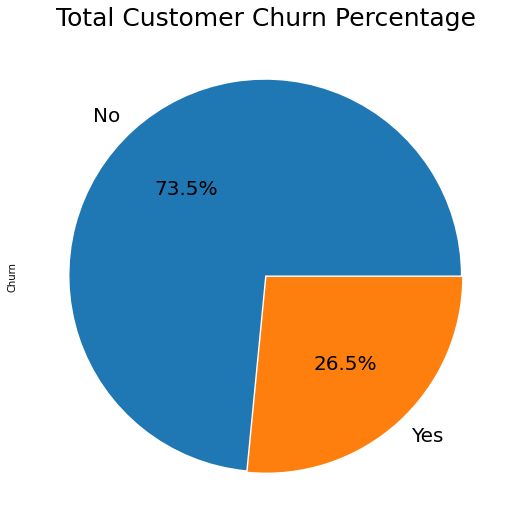

In [16]:
df["Churn"].value_counts().plot.pie(explode=[0.005, 0.005],  autopct= "%1.1f%%", figsize= (9, 9), fontsize=20)
plt.title("Total Customer Churn Percentage", fontsize=25)
plt.show()

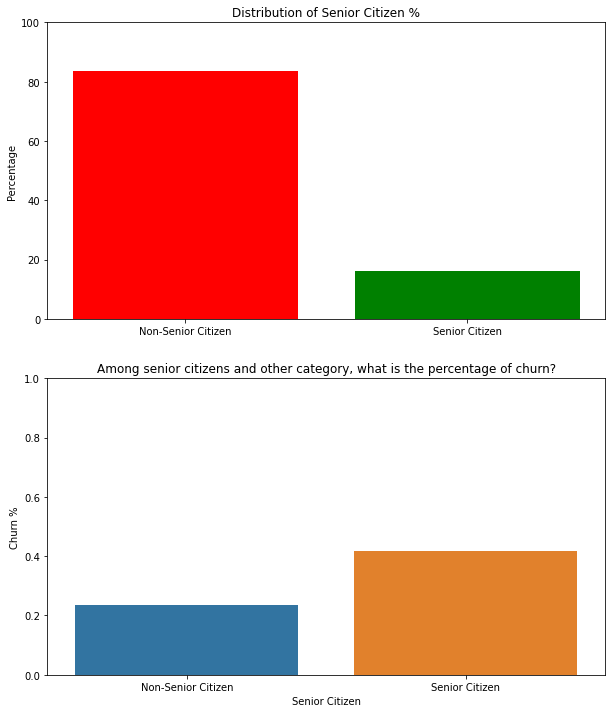

In [17]:
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(10,12))

data = df["SeniorCitizen"].value_counts(normalize=True).sort_index()
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Senior Citizen %')
axes1.set_ylabel('Percentage')
axes1.set_xticks([0, 1])
axes1.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes1.set_ylim(0,100)

sns.barplot(x="SeniorCitizen", y="ChurnVal", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Senior Citizen')
axes2.set_ylabel('Churn %')
axes2.set_title('Among senior citizens and other category, what is the percentage of churn?')
axes2.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes2.set_ylim(0,1)

plt.show()

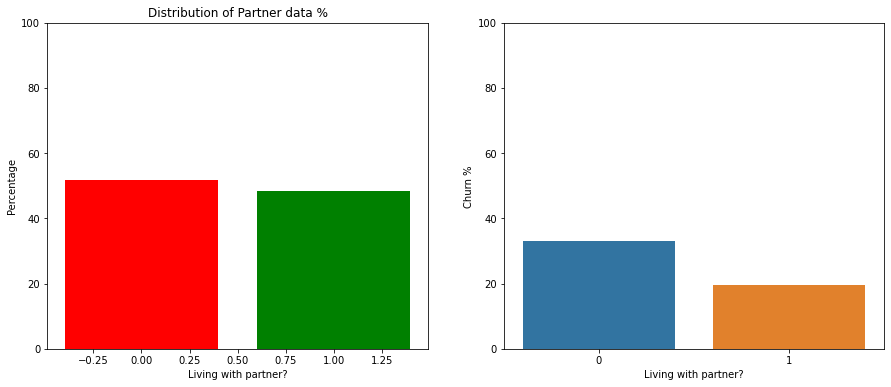

In [18]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

data = df["Partner_Yes"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Partner data %')
axes1.set_xlabel('Living with partner?')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

sns.barplot(x="Partner_Yes", y=df.ChurnVal*100, data=df, ci=None, ax=axes2)
axes2.set_xlabel('Living with partner?')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)

plt.show()

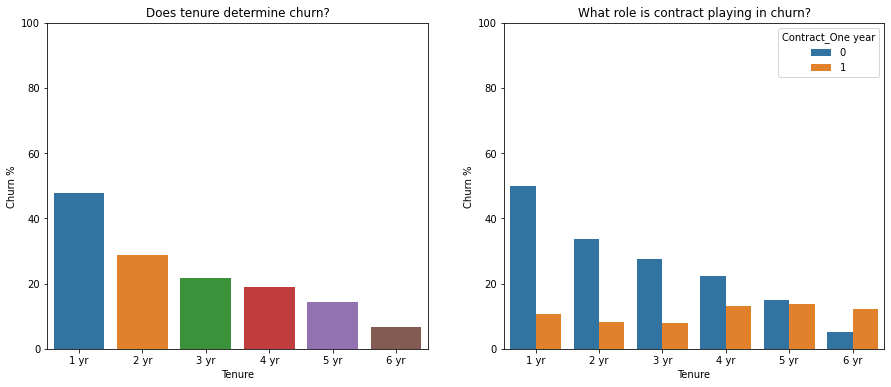

In [19]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
df['tenureGroup'] = pd.cut(df["tenure"], bins, labels=labels)

# Draw a bar plot of tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureGroup", y=df.ChurnVal*100, data=df, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

# Draw a bar plot of tenure vs churn vs contract
sns.barplot(x="tenureGroup", y=df.ChurnVal*100, hue="Contract_One year", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is contract playing in churn?')
plt.show()

Churn Rate by Gender

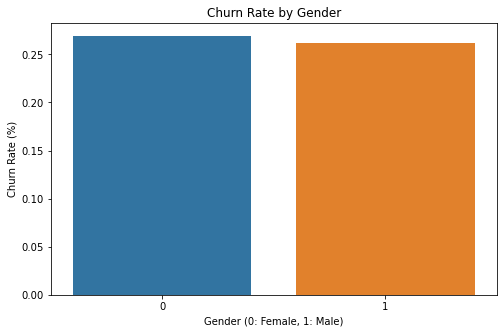

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='gender_Male', y='ChurnVal', data=df, ci=None)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Churn Rate (%)')
plt.show()

Churn Rate by Partner Status

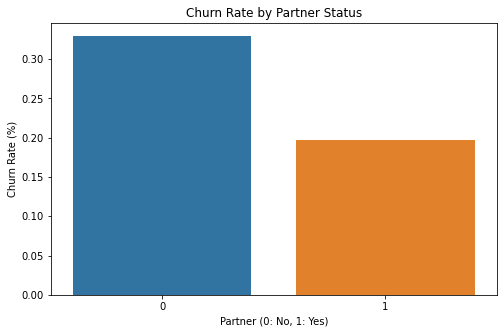

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Partner_Yes', y='ChurnVal', data=df, ci=None)
plt.title('Churn Rate by Partner Status')
plt.xlabel('Partner (0: No, 1: Yes)')
plt.ylabel('Churn Rate (%)')
plt.show()

Monthly Charges Distribution

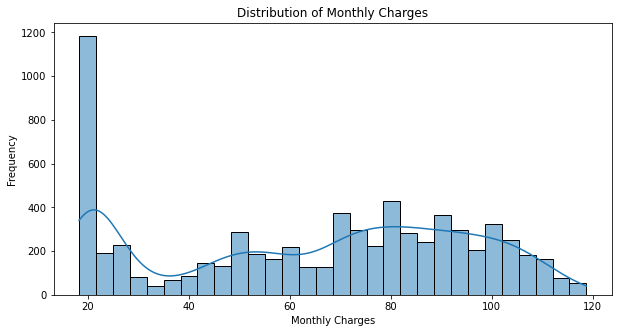

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

Churn Rate by Tenure

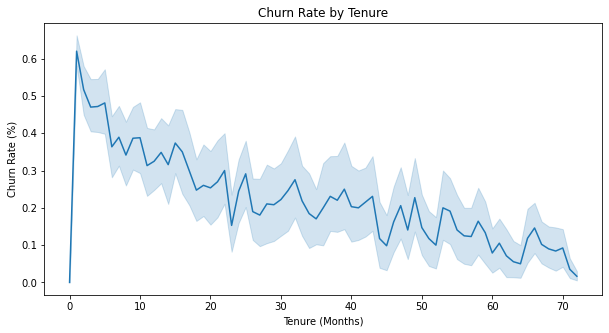

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='tenure', y='ChurnVal', estimator='mean')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.show()

Scatter Plot of Monthly Charges vs. Tenure

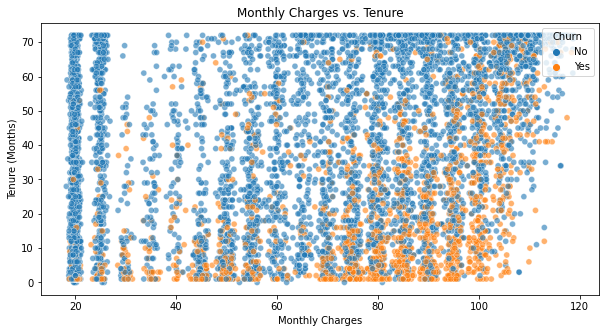

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='MonthlyCharges', y='tenure', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs. Tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure (Months)')
plt.legend(title='Churn', loc='upper right')
plt.show()

Churn Rate by Payment Method

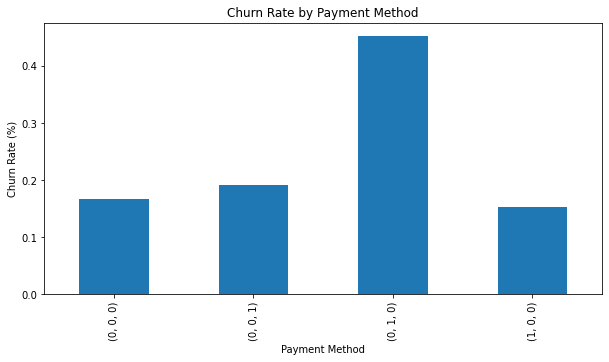

In [25]:
plt.figure(figsize=(10, 5))
payment_method_churn = df.groupby(['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']).mean()['ChurnVal']
payment_method_churn.plot(kind='bar')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.show()

Boxplot of Monthly Charges by Churn

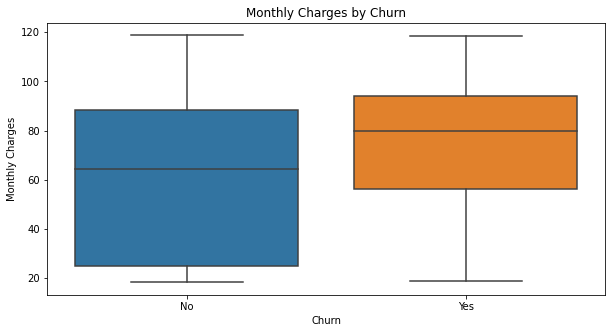

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Count of Internet Service Types

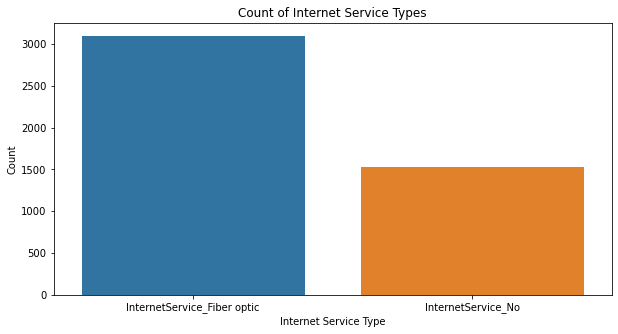

In [27]:
plt.figure(figsize=(10, 5))
internet_service_count = df[['InternetService_Fiber optic', 'InternetService_No']].sum()
sns.barplot(x=internet_service_count.index, y=internet_service_count.values)
plt.title('Count of Internet Service Types')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

Pair Plot of Numeric Features

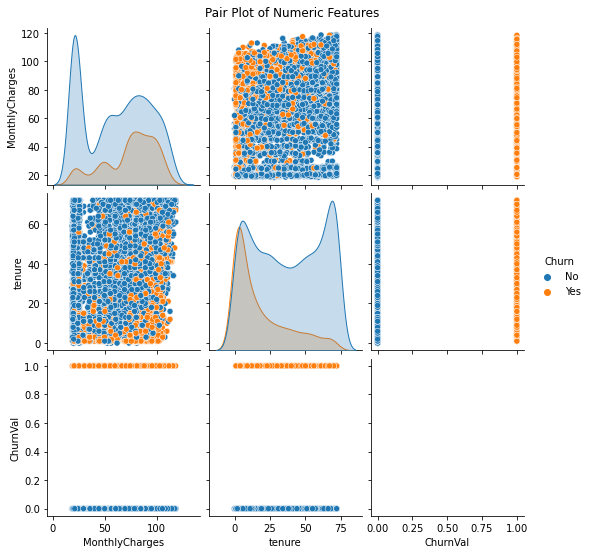

In [28]:
sns.pairplot(df, hue='Churn', vars=['MonthlyCharges', 'tenure', 'ChurnVal'])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

Scatter plot for Monthly Charges, Tenure, and Churn

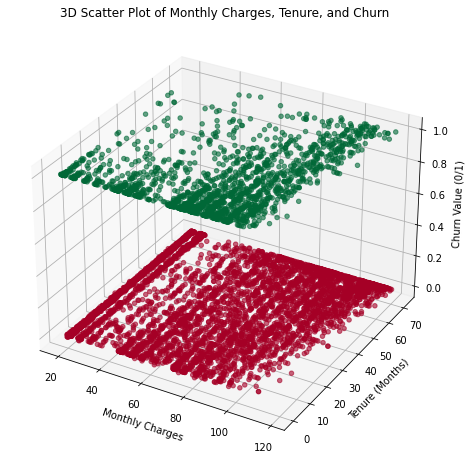

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['MonthlyCharges'], df['tenure'], df['ChurnVal'], c=df['ChurnVal'], cmap='RdYlGn', alpha=0.6)

ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Tenure (Months)')
ax.set_zlabel('Churn Value (0/1)')
plt.title('3D Scatter Plot of Monthly Charges, Tenure, and Churn')
plt.show()


What is the ratio of the customer's gender and churn?

Heatmap of Correlation Matrix

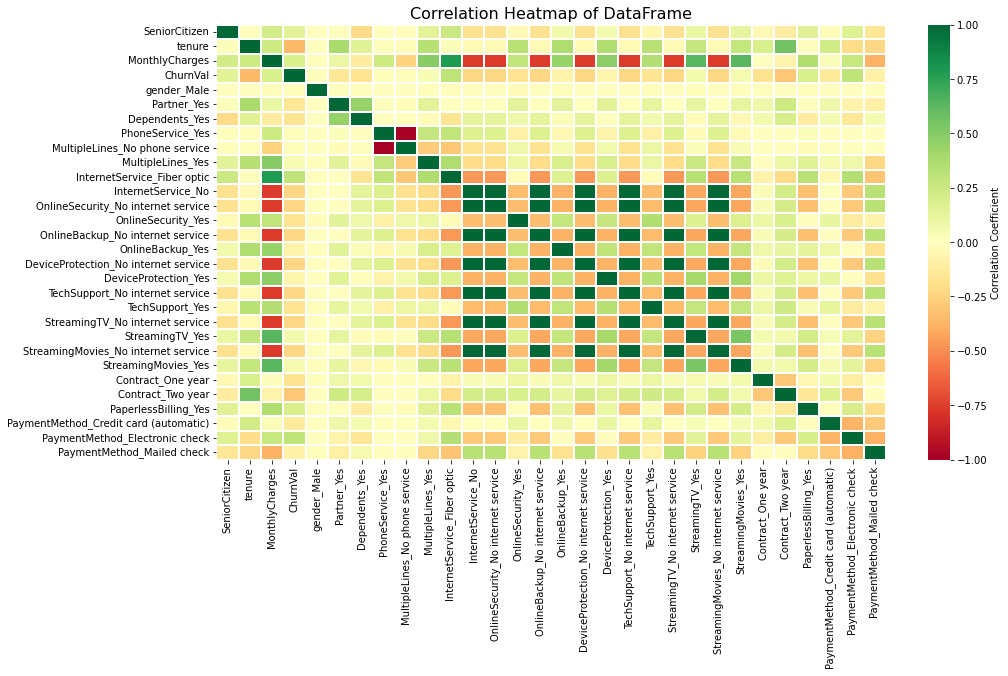

In [30]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 8)) 
sns.heatmap(correlation_matrix, annot=False, cmap='RdYlGn', linewidths=0.2, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of DataFrame', fontsize=16)
plt.show()

# Splitting data into training and testing

In [31]:
X = df.drop(columns=['Churn', 'ChurnVal']) 
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

In [32]:
report = sv.compare([train_df, "Training Data"], [test_df, "Test Data"])

report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Preprocessing

Data Imputation

In [33]:
print(df.isnull().sum())

# Impute missing values for numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())

customerID                                0
SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                              0
Churn                                     0
ChurnVal                                  0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                 

Feature Selection

In [34]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  
df = df.dropna() 

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('ChurnVal', axis=1)
y = df['ChurnVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))

                          Feature  Importance
7061                    Churn_Yes    0.385804
3                    TotalCharges    0.055723
1                          tenure    0.053412
2                  MonthlyCharges    0.044368
10    InternetService_Fiber optic    0.023185
...                           ...         ...
3276        customerID_4656-CAURT    0.000000
3282        customerID_4662-EKDPQ    0.000000
5868        customerID_8224-KDLKN    0.000000
3290        customerID_4673-KKSLS    0.000000
3533        customerID_4981-FLTMF    0.000000

[7067 rows x 2 columns]


Scaling

In [35]:
# List of numerical columns to scale (excluding target and any non-numeric features)
num_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

print("Scaled numerical data:\n", X[num_cols].head())

Scaled numerical data:
    SeniorCitizen    tenure  MonthlyCharges  TotalCharges
0      -0.440327 -1.280248       -1.161694     -0.994194
1      -0.440327  0.064303       -0.260878     -0.173740
2      -0.440327 -1.239504       -0.363923     -0.959649
3      -0.440327  0.512486       -0.747850     -0.195248
4      -0.440327 -1.239504        0.196178     -0.940457


Encoding Categorical Features

In [36]:
from sklearn.preprocessing import LabelEncoder

print("Columns in df:", df.columns)
cat_cols = [col for col in cat_cols if col in df.columns and col != 'customerID']

# Label Encoding for binary categorical features
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

# One-Hot Encoding for remaining categorical features
X = pd.get_dummies(X, drop_first=True)

print("Data after encoding:\n", X.head())

Columns in df: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnVal',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service',
       ...
       'customerID_9992-RRAMN', 'customerID_9992-UJOEL',
       'customerID_9993-LHIEB', 'customerID_9995-HOTOH', 'Churn_Yes',
       'tenureGroup_2 yr', 'tenureGroup_3 yr', 'tenureGroup_4 yr',
       'tenureGroup_5 yr', 'tenureGroup_6 yr'],
      dtype='object', length=7068)
Data after encoding:
    SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      -0.440327 -1.280248       -1.161694     -0.994194            0   
1      -0.440327  0.064303       -0.260878     -0.173740            1   
2      -0.440327 -1.239504       -0.363923     -0.959649            1   
3      -0.440327  0.512486       -0.747850     -0.195248            1   
4      -0.440327 -1.239504        0.196178     -0.940457            0   

   Partner_Yes  Dependents_Yes  PhoneSer

In [37]:
# Display the first few rows of the preprocessed dataset
print("Preprocessed data:\n", X.head())
print("Shape of the preprocessed data:", X.shape)

Preprocessed data:
    SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      -0.440327 -1.280248       -1.161694     -0.994194            0   
1      -0.440327  0.064303       -0.260878     -0.173740            1   
2      -0.440327 -1.239504       -0.363923     -0.959649            1   
3      -0.440327  0.512486       -0.747850     -0.195248            1   
4      -0.440327 -1.239504        0.196178     -0.940457            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0            

# Address Data Imbalance (using the SMOTE technique) 

SMOTE which creates synthetic samples of the minority class to balance the dataset.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE with a desired random state for reproducibility
smote = SMOTE(random_state=42)

# Fit SMOTE only on the training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("Original dataset class distribution:", y_train.value_counts())
print("Resampled dataset class distribution:", y_train_resampled.value_counts())

Original dataset class distribution: 0    4130
1    1495
Name: ChurnVal, dtype: int64
Resampled dataset class distribution: 0    4130
1    4130
Name: ChurnVal, dtype: int64


Class 0 (non-churned customers)

Class 1 (churned customers)

# Splitting Train/Test Dataset

In [39]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 5625
Test set size: 1407


# Building and Evaluating Model

Naive Bayes Model

No missing values in the dataset.
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



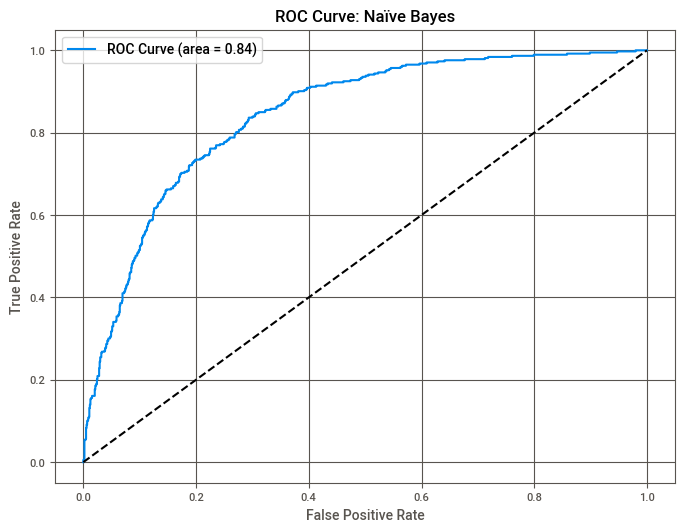

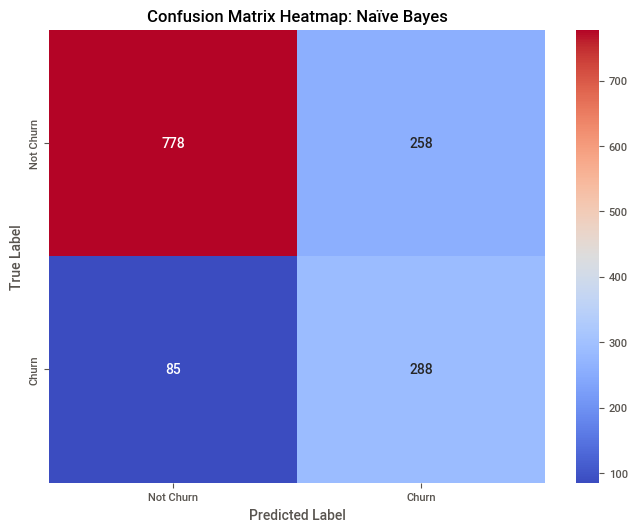

In [40]:
data = pd.read_csv('D:/PACE/Intro to Data Science/Project 1/telco-customer-churn.csv')

data.drop(['customerID'], axis=1, inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna(data.median(), inplace=True)

if data.isnull().sum().sum() > 0:
    print("There are still missing values in the dataset.")
else:
    print("No missing values in the dataset.")

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naïve Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)
y_prob = naive_bayes_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Assuming 1 indicates churn
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report: ")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Naïve Bayes')
plt.legend()
plt.grid()
plt.show()

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix Heatmap: Naïve Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Logistic Regression Model

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



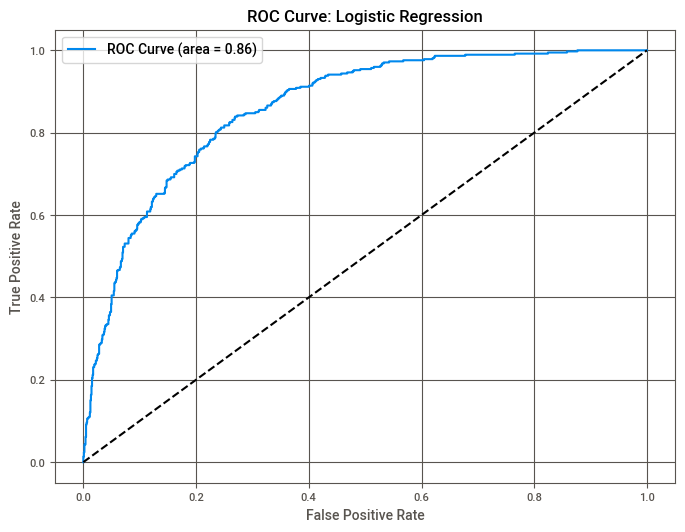

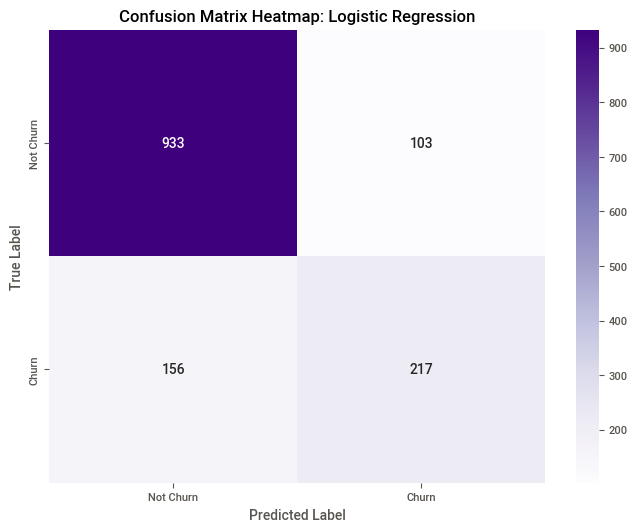

In [41]:
# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report: ")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.grid()
plt.show()

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix Heatmap: Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest Model

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



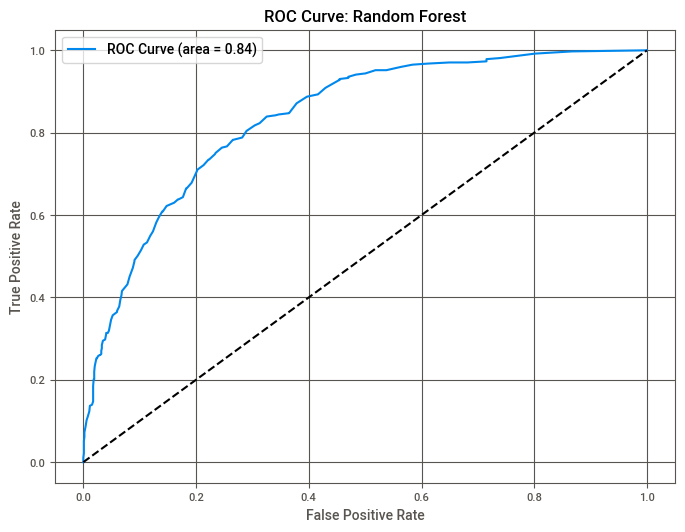

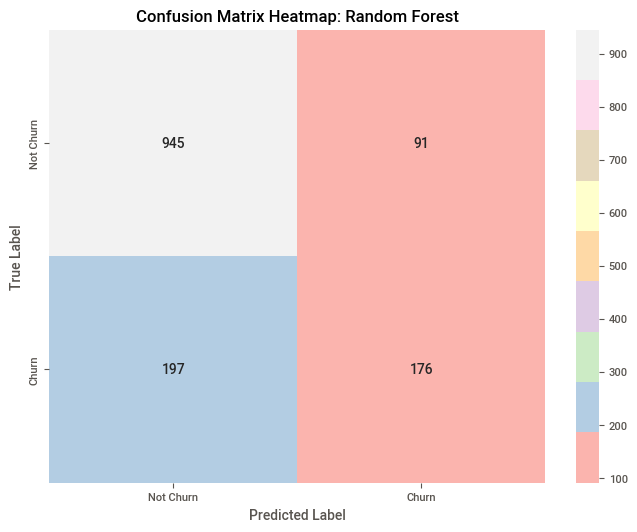

In [42]:
# Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Assuming 1 indicates churn
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report: ")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend()
plt.grid()
plt.show()

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix Heatmap: Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

XGBoost model

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



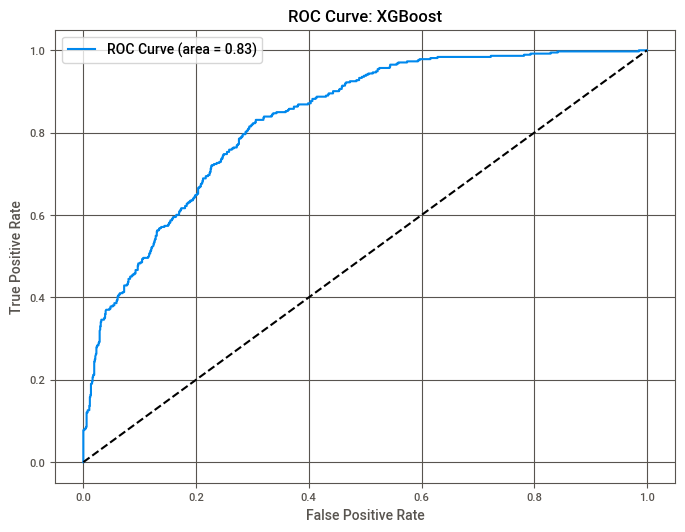

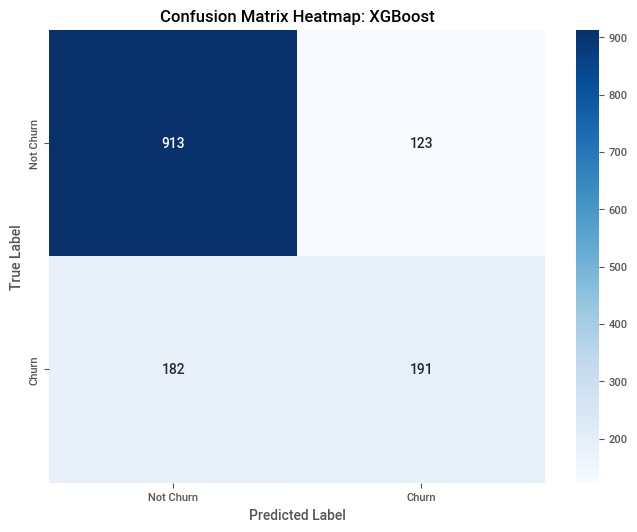

In [43]:
# Train the XGBoost model
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgboost_model.predict(X_test)
y_prob = xgboost_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Assuming 1 indicates churn
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification Report: ")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost')
plt.legend()
plt.grid()
plt.show()

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix Heatmap: XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

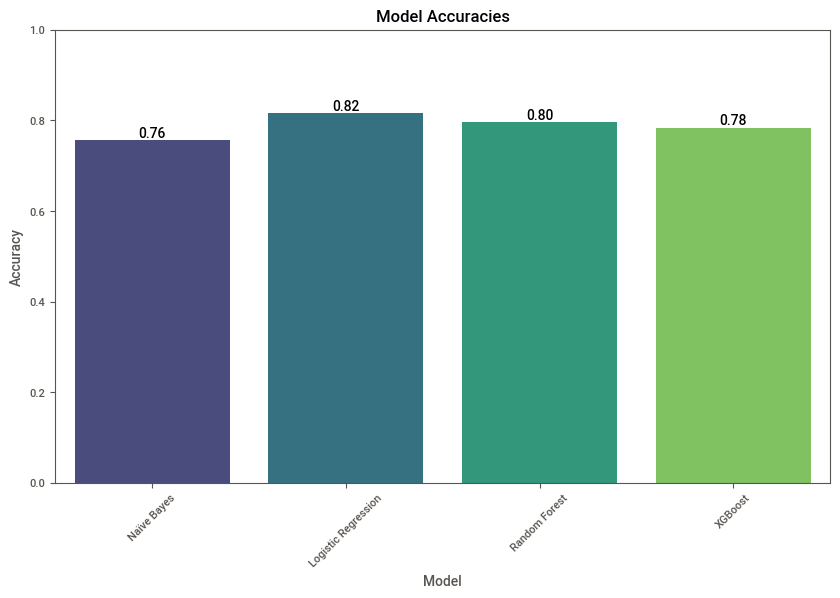

In [44]:
model_accuracies = {}

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    return accuracy

models = {
    "Naïve Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    evaluate_model(model, model_name)

accuracy_df = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

plt.show()

# Model Tuning (Hyperparameters Tuning) 

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

tuned_models = {}

for model_name, params in param_grids.items():
    if model_name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)
    
    grid_search.fit(X_train, y_train)
    
    tuned_models[model_name] = grid_search.best_estimator_
    
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')

for model_name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of tuned {model_name}: {accuracy:.4f}')

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy of tuned Logistic Regression: 0.8141
Accuracy of tuned Random Forest: 0.8105
